# Практическая работа
## Линейная регрессия: California Housing Prices
### Крючкова Анастасия Сергеевна & Зухир Амира Саидовна ИВТ 1.2

In [21]:
%pip install pandas matplotlib seaborn numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Загрузка данных

In [23]:
data = pd.read_csv('./data/housing.csv')

# Разделение данных на признаки и целевую переменную

In [24]:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Разбиение на тренировочную и тестовую выборки с помощью train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение числовых и категориальных признаков

In [26]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

# Создание пайплайна для числовых признаков

In [27]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Создание пайплайна для категориальных признаков

In [28]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Объединение пайплайнов в ColumnTransformer

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Создание и обучение модели

In [30]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


# Перебор гиперпараметров с использованием RandomizedSearchCV

In [31]:
param_distributions = {
    'regressor__fit_intercept': [True, False]
}
random_search = RandomizedSearchCV(model, param_distributions, n_iter=4, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)
print("Лучшие параметры (RandomizedSearchCV): ", random_search.best_params_)
best_random_model = random_search.best_estimator_

Лучшие параметры (RandomizedSearchCV):  {'regressor__fit_intercept': True}


# Оценка модели RandomizedSearchCV

In [32]:
y_train_pred = best_random_model.predict(X_train)
y_test_pred = best_random_model.predict(X_test)

# Подсчет метрик

In [33]:
# Подсчет метрик
mse_best_random = mean_squared_error(y_test, y_test_pred)
r2_best_random = r2_score(y_test, y_test_pred)
mae_best_random = mean_absolute_error(y_test, y_test_pred)
mape_best_random = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print(f'Лучший Mean Squared Error (RandomizedSearchCV): {mse_best_random}')
print(f'Лучший R^2 Score (RandomizedSearchCV): {r2_best_random}')
print(f'Mean Absolute Error (RandomizedSearchCV): {mae_best_random}')
print(f'Mean Absolute Percentage Error (RandomizedSearchCV): {mape_best_random}%')

Лучший Mean Squared Error (RandomizedSearchCV): 4908290571.346432
Лучший R^2 Score (RandomizedSearchCV): 0.6254382675296266
Mean Absolute Error (RandomizedSearchCV): 50670.48923565362
Mean Absolute Percentage Error (RandomizedSearchCV): 29.19194627216551%


# Значение свободного члена (intercept) обученной модели

In [34]:
print(f'Значение свободного члена (intercept) обученной модели: {best_random_model.named_steps["regressor"].intercept_}')

Значение свободного члена (intercept) обученной модели: 238826.3594452512


# Визуализация ошибок

Text(0, 0.5, 'Linear regression model')

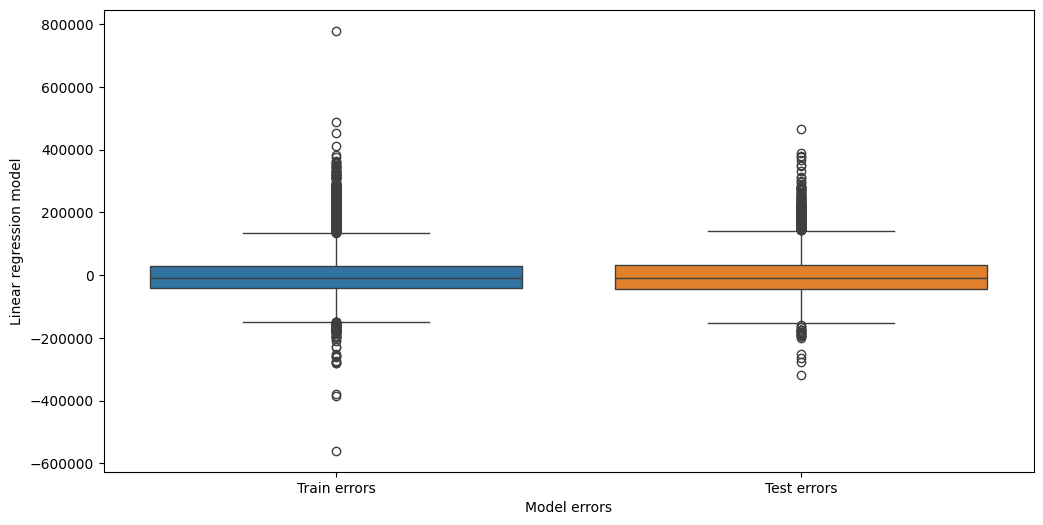

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
y_train_errors = y_train - y_train_pred
y_test_errors = y_test - y_test_pred
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors, 
     'Test errors': y_test_errors
    }
)
sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model errors')
ax.set_ylabel('Linear regression model')

# Перебор гиперпараметров с использованием GridSearchCV

In [36]:
param_grid = {
    'regressor__fit_intercept': [True, False]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Лучшие параметры (GridSearchCV): ", grid_search.best_params_)
best_grid_model = grid_search.best_estimator_

Лучшие параметры (GridSearchCV):  {'regressor__fit_intercept': True}


# Оценка модели GridSearchCV

In [37]:
y_train_pred_grid = best_grid_model.predict(X_train)
y_test_pred_grid = best_grid_model.predict(X_test)

# Подсчет метрик для GridSearchCV

In [38]:
mse_best_grid = mean_squared_error(y_test, y_test_pred_grid)
r2_best_grid = r2_score(y_test, y_test_pred_grid)
mae_best_grid = mean_absolute_error(y_test, y_test_pred_grid)
mape_best_grid = np.mean(np.abs((y_test - y_test_pred_grid) / y_test)) * 100

print(f'Лучший Mean Squared Error (GridSearchCV): {mse_best_grid}')
print(f'Лучший R^2 Score (GridSearchCV): {r2_best_grid}')
print(f'Mean Absolute Error (GridSearchCV): {mae_best_grid}')
print(f'Mean Absolute Percentage Error (GridSearchCV): {mape_best_grid}%')

Лучший Mean Squared Error (GridSearchCV): 4908290571.346432
Лучший R^2 Score (GridSearchCV): 0.6254382675296266
Mean Absolute Error (GridSearchCV): 50670.48923565362
Mean Absolute Percentage Error (GridSearchCV): 29.19194627216551%


# Значение свободного члена (intercept) обученной модели GridSearchCV

In [39]:
print(f'Значение свободного члена (intercept) обученной модели GridSearchCV: {best_grid_model.named_steps["regressor"].intercept_}')

Значение свободного члена (intercept) обученной модели GridSearchCV: 238826.3594452512


# Визуализация ошибок для GridSearchCV

Text(0, 0.5, 'Linear regression model (GridSearchCV)')

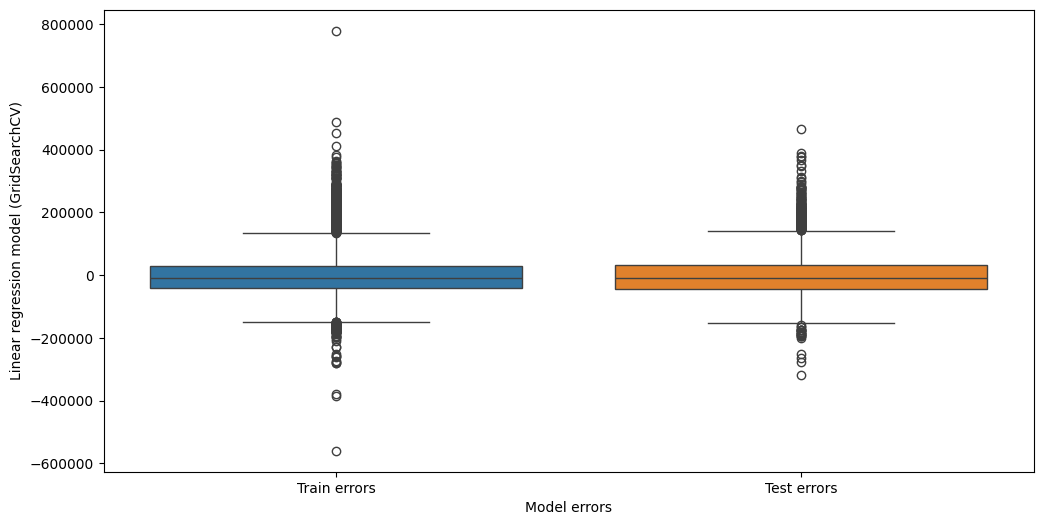

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
y_train_errors_grid = y_train - y_train_pred_grid
y_test_errors_grid = y_test - y_test_pred_grid
predict_df_grid = pd.DataFrame(
    {'Train errors': y_train_errors_grid, 
     'Test errors': y_test_errors_grid
    }
)
sns.boxplot(data=predict_df_grid, ax=ax)
ax.set_xlabel('Model errors')
ax.set_ylabel('Linear regression model (GridSearchCV)')